In [1]:
!pip install nltk

In [2]:
!pip install gensim

In [2]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px



In [3]:
stock_df = pd.read_csv('stock_sentiment (1).csv')

In [4]:
stock_df.head(10)

Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1
5                                  PGNX  Over 3.04            1
6  AAP - user if so then the current downtrend wi...          0
7  Monday's relative weakness. NYX WIN TIE TAP IC...          0
8  GOOG - ower trend line channel test & volume s...          1
9             AAP will watch tomorrow for ONG entry.          1

In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [8]:
stock_df['Sentiment'].unique()

array([1, 0], dtype=int64)

In [9]:
stock_df.isna().sum()

Text         0
Sentiment    0
dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

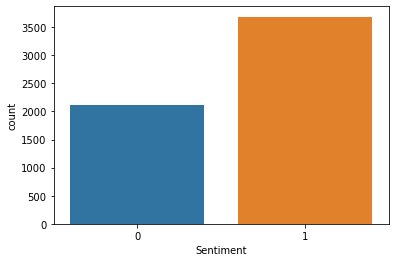

In [10]:
sns.countplot(x = stock_df['Sentiment'])

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
 #1: PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)

In [18]:
#a = "i love ML & AI !!!"
a = 'Good morning beautiful people :)... #I am having fun learning Finance with Python!!'

In [19]:
a_punc_removed = [char for char in a if char not in string.punctuation]

In [20]:
a_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'F',
 'i',
 'n',
 'a',
 'n',
 'c',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'P',
 'y',
 't',
 'h',
 'o',
 'n']

In [21]:
a_punc_removed = ''.join(a_punc_removed)

In [22]:
a_punc_removed

'Good morning beautiful people  I am having fun learning Finance with Python'

In [23]:
def rem_pun(message):
    punc_rem = [char for char in message if char not in string.punctuation]
    punc_rem_joined = ''.join(punc_rem)
    return punc_rem_joined

In [24]:
rem_pun('Good morning beautiful people :)... #I am having fun learning Finance with Python!!')

'Good morning beautiful people  I am having fun learning Finance with Python'

In [25]:
stock_df.head()

Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1

In [26]:
# adding new column without punctuatyion
stock_df['Text_without punctuation'] = stock_df['Text'].apply(rem_pun)

In [28]:
stock_df.head(25)

Text  Sentiment  \
0   Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1   user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2   user I'd be afraid to short AMZN - they are lo...          1   
3                                   MNTA Over 12.00            1   
4                                    OI  Over 21.37            1   
5                                   PGNX  Over 3.04            1   
6   AAP - user if so then the current downtrend wi...          0   
7   Monday's relative weakness. NYX WIN TIE TAP IC...          0   
8   GOOG - ower trend line channel test & volume s...          1   
9              AAP will watch tomorrow for ONG entry.          1   
10  i'm assuming FCX opens tomorrow above the 34.2...          1   
11  It really worries me how everyone expects the ...          1   
12  AAP GAMCO's arry Haverty : Apple Is Extremely ...          1   
13  user Maykiljil posted that.  I agree that MSFT...          1   
14  Momentum is coming back to ETFC Broke MA200 re...          1   
15  HA Hitting 35.65 means resume targeting 42 lev...          1   
16  user gameplan shot for today but I liked  on t...          1   
17  with FCX gapping well above ideal entry lookin...          1   
18  user great list again, particularly like FISV ...          1   
19                           ATHX upper trend line             1   
20   NG - nice PNF BY - breakout - need follow thru            1   
21  Won't believe AAP uptrend is back until it cro...          0   
22                                X swing still on             1   
23   SWY - 30% of float short and breaking out - ouch          1   
24                         BIOF wants 4.90's comin!!!          1   

                             Text_without punctuation  
0   Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1   user AAP MOVIE 55 return for the FEAGEED indic...  
2   user Id be afraid to short AMZN  they are look...  
3                                    MNTA Over 1200    
4                                     OI  Over 2137    
5                                    PGNX  Over 304    
6   AAP  user if so then the current downtrend wil...  
7   Mondays relative weakness NYX WIN TIE TAP ICE ...  
8   GOOG  ower trend line channel test  volume sup...  
9               AAP will watch tomorrow for ONG entry  
10  im assuming FCX opens tomorrow above the 3425 ...  
11  It really worries me how everyone expects the ...  
12  AAP GAMCOs arry Haverty  Apple Is Extremely Ch...  
13  user Maykiljil posted that  I agree that MSFT ...  
14  Momentum is coming back to ETFC Broke MA200 re...  
15  HA Hitting 3565 means resume targeting 42 leve...  
16  user gameplan shot for today but I liked  on t...  
17  with FCX gapping well above ideal entry lookin...  
18  user great list again particularly like FISV a...  
19                           ATHX upper trend line     
20      NG  nice PNF BY  breakout  need follow thru    
21  Wont believe AAP uptrend is back until it cros...  
22                                X swing still on     
23      SWY  30 of float short and breaking out  ouch  
24                              BIOF wants 490s comin

In [37]:
char_set = []
for i in a:
    if i not in string.punctuation:
        char_set.append(i)
char_set_joined = ''.join(char_set)

In [38]:
char_set

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'b',
 'e',
 'a',
 'u',
 't',
 'i',
 'f',
 'u',
 'l',
 ' ',
 'p',
 'e',
 'o',
 'p',
 'l',
 'e',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'h',
 'a',
 'v',
 'i',
 'n',
 'g',
 ' ',
 'f',
 'u',
 'n',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'F',
 'i',
 'n',
 'a',
 'n',
 'c',
 'e',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'P',
 'y',
 't',
 'h',
 'o',
 'n']

In [39]:
char_set_joined

'Good morning beautiful people  I am having fun learning Finance with Python'

In [40]:
 #2: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [44]:
nltk.download('stopwords')
stopwords.words('English')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Parikshith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [58]:
from nltk.corpus import stopwords
stop_words = stopwords.words('English')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year','https'])

In [59]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token)>=2:
            result.append(token)
    return result
        

In [61]:
stock_df['Text without punctaution and stopwords'] = stock_df['Text_without punctuation'].apply(preprocess)

In [62]:
stock_df.head(15)

Text  Sentiment  \
0   Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1   user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2   user I'd be afraid to short AMZN - they are lo...          1   
3                                   MNTA Over 12.00            1   
4                                    OI  Over 21.37            1   
5                                   PGNX  Over 3.04            1   
6   AAP - user if so then the current downtrend wi...          0   
7   Monday's relative weakness. NYX WIN TIE TAP IC...          0   
8   GOOG - ower trend line channel test & volume s...          1   
9              AAP will watch tomorrow for ONG entry.          1   
10  i'm assuming FCX opens tomorrow above the 34.2...          1   
11  It really worries me how everyone expects the ...          1   
12  AAP GAMCO's arry Haverty : Apple Is Extremely ...          1   
13  user Maykiljil posted that.  I agree that MSFT...          1   
14  Momentum is coming back to ETFC Broke MA200 re...          1   

                             Text_without punctuation  \
0   Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1   user AAP MOVIE 55 return for the FEAGEED indic...   
2   user Id be afraid to short AMZN  they are look...   
3                                    MNTA Over 1200     
4                                     OI  Over 2137     
5                                    PGNX  Over 304     
6   AAP  user if so then the current downtrend wil...   
7   Mondays relative weakness NYX WIN TIE TAP ICE ...   
8   GOOG  ower trend line channel test  volume sup...   
9               AAP will watch tomorrow for ONG entry   
10  im assuming FCX opens tomorrow above the 3425 ...   
11  It really worries me how everyone expects the ...   
12  AAP GAMCOs arry Haverty  Apple Is Extremely Ch...   
13  user Maykiljil posted that  I agree that MSFT ...   
14  Momentum is coming back to ETFC Broke MA200 re...   

               Text without punctaution and stopwords  
0   [kickers, watchlist, xide, tit, soq, pnk, cpw,...  
1   [movie, return, feageed, indicator, trades, aw...  
2   [id, afraid, short, amzn, looking, like, nearm...  
3                                              [mnta]  
4                                                [oi]  
5                                              [pgnx]  
6   [current, downtrend, break, otherwise, shortte...  
7   [mondays, relative, weakness, nyx, win, tie, t...  
8   [goog, ower, trend, line, channel, test, volum...  
9                       [watch, tomorrow, ong, entry]  
10  [im, assuming, fcx, opens, tomorrow, trigger, ...  
11  [really, worries, everyone, expects, market, r...  
12  [gamcos, arry, haverty, apple, extremely, chea...  
13  [maykiljil, posted, agree, msft, going, higher...  
14  [momentum, coming, back, etfc, broke, resistan...

In [63]:
stock_df['Text_without punctuation'][6]

'AAP  user if so then the current downtrend will break Otherwise just a shortterm correction in medterm downtrend'

In [64]:
stock_df['Text without punctaution and stopwords'][6]

['current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend']

In [65]:
 #3: PLOT WORDCLOUD

In [66]:
stock_df['Text without punctaution and stopwords joined'] =  stock_df['Text without punctaution and stopwords'].apply(lambda x : ' '.join(x))

In [67]:
stock_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                               Text_without punctuation  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                 Text without punctaution and stopwords  \
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1     [movie, return, feageed, indicator, trades, aw...   
2     [id, afraid, short, amzn, looking, like, nearm...   
3                                                [mnta]   
4                                                  [oi]   
...                                                 ...   
5786  [industry, body, cii, said, discoms, likely, s...   
5787  [gold, prices, slip, rs, investors, book, prof...   
5788  [workers, bajaj, auto, agreed, wage, cut, peri...   
5789  [sharemarket, live, sensex, high, points, nift...   
5790  [sensex, nifty, climb, days, highs, still, key...   

          Text without punctaution and stopwords joined  
0     kickers watchlist xide tit soq pnk cpw bpz aj ...  
1         movie return feageed indicator trades awesome  
2     id afraid short amzn looking like nearmonopoly...  
3                                                  mnta  
4                                                    oi  
...                                                 ...  
5786  industry body cii said discoms likely suffer n...  
5787  gold prices slip rs investors book profits ami...  
5788  workers bajaj auto agreed wage cut period apri...  
5789  sharemarket live sensex high points nifty test...  
5790  sensex nifty climb days highs still key factor...  

[5791 rows x 5 columns]

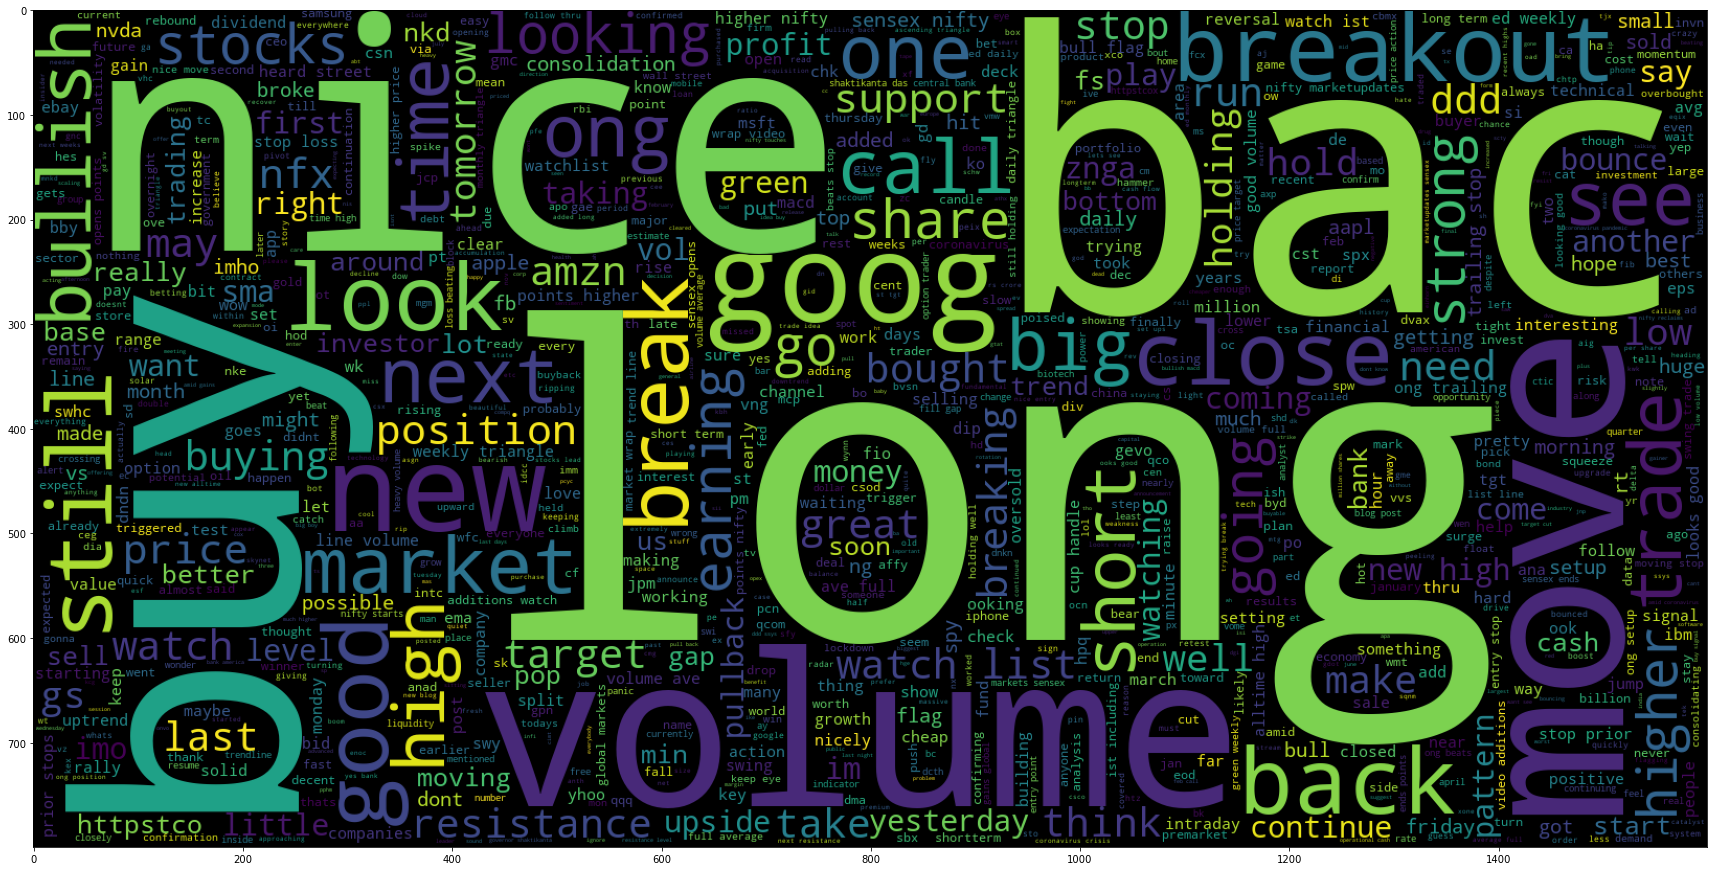

In [72]:
plt.figure(figsize = (30,30))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text without punctaution and stopwords joined']))
plt.imshow(wc)

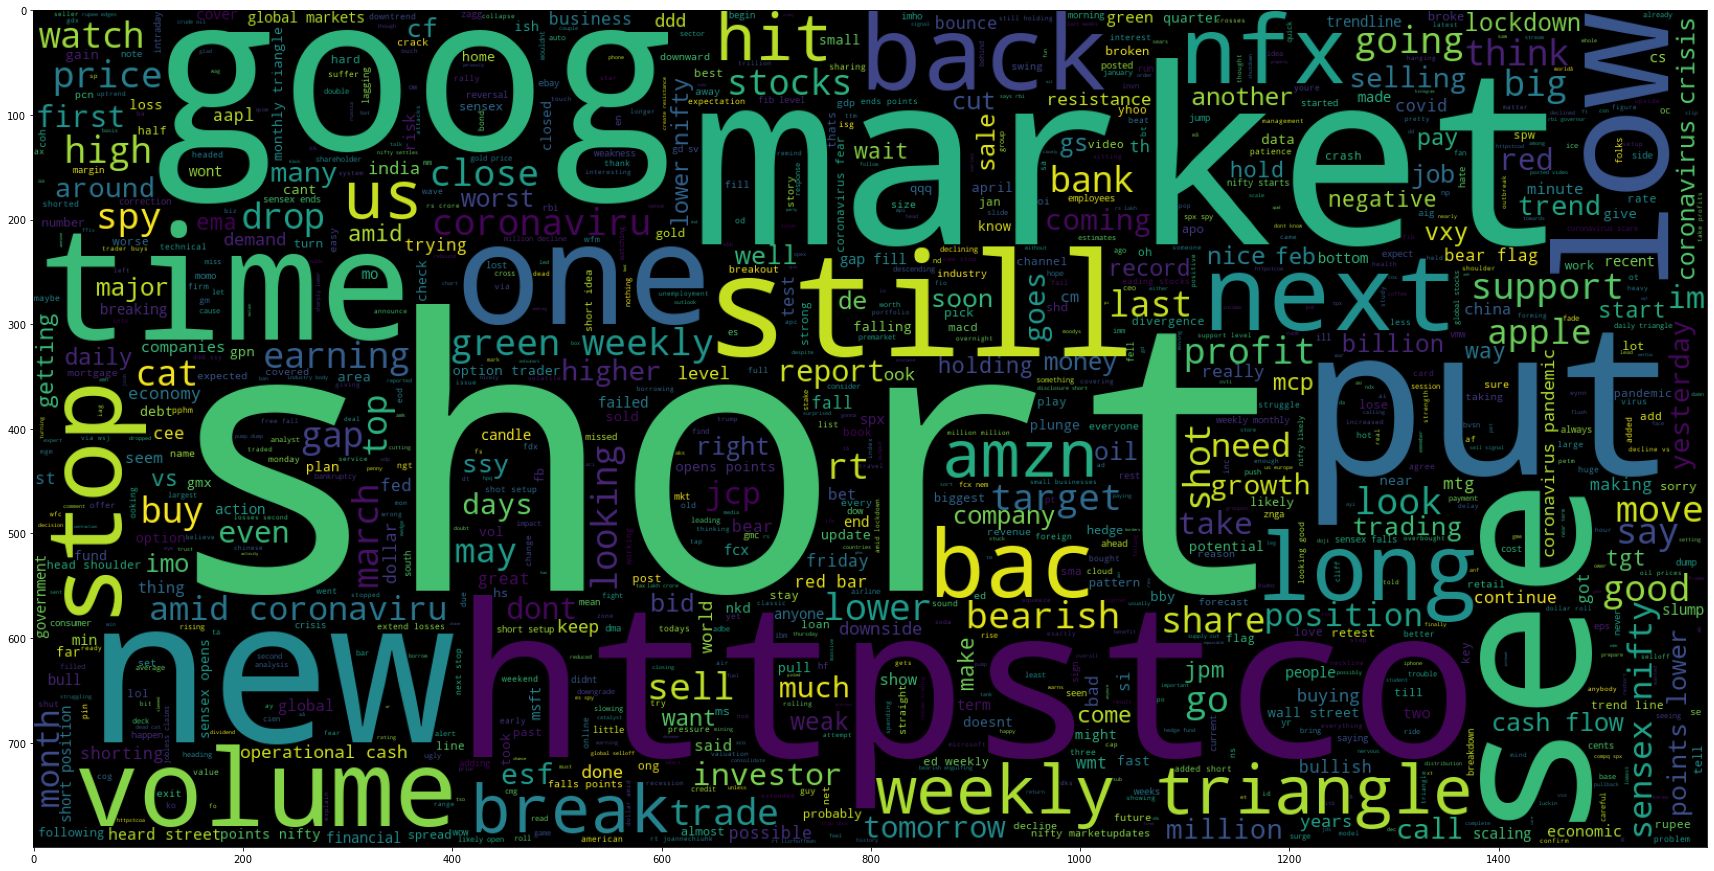

In [73]:
plt.figure(figsize = (30,30))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text without punctaution and stopwords joined']))
plt.imshow(wc)

In [83]:
#4: VISUALIZE CLEANED DATASETS

In [76]:
nltk.download('punkt')
nltk.word_tokenize(stock_df['Text without punctaution and stopwords joined'][0])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Parikshith\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'aj',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [78]:
max_length = -1
for doc in stock_df['Text without punctaution and stopwords joined']:
    tokens = nltk.word_tokenize(doc)
    if (max_length < len(tokens)):
        max_length = len(tokens)
print(max_length)        

22


In [79]:
tweets_length = [    len(nltk.word_tokenize(x)) for x in stock_df['Text without punctaution and stopwords joined']]

In [80]:
tweets_length

[15,
 6,
 8,
 1,
 1,
 1,
 8,
 13,
 8,
 4,
 11,
 18,
 8,
 8,
 11,
 6,
 14,
 10,
 12,
 4,
 7,
 5,
 2,
 5,
 3,
 11,
 3,
 4,
 9,
 6,
 8,
 10,
 9,
 4,
 10,
 13,
 4,
 8,
 12,
 10,
 11,
 7,
 9,
 9,
 5,
 10,
 8,
 7,
 8,
 9,
 11,
 10,
 8,
 2,
 16,
 12,
 10,
 8,
 2,
 15,
 7,
 11,
 5,
 17,
 7,
 7,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 19,
 7,
 9,
 7,
 3,
 11,
 5,
 4,
 10,
 11,
 17,
 4,
 10,
 6,
 7,
 2,
 1,
 7,
 11,
 5,
 7,
 7,
 8,
 10,
 1,
 4,
 10,
 4,
 16,
 9,
 11,
 11,
 18,
 6,
 8,
 13,
 12,
 9,
 3,
 4,
 10,
 10,
 8,
 7,
 8,
 5,
 6,
 8,
 10,
 15,
 3,
 5,
 9,
 19,
 15,
 11,
 3,
 1,
 1,
 3,
 7,
 13,
 12,
 10,
 9,
 12,
 10,
 11,
 16,
 8,
 9,
 10,
 12,
 10,
 6,
 12,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 13,
 5,
 5,
 3,
 7,
 3,
 5,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 11,
 9,
 10,
 12,
 9,
 10,
 7,
 3,
 7,
 5,
 9,
 9,
 4,
 6,
 7,
 4,
 5,
 9,
 10,
 10,
 10,
 14,
 10,
 10,
 10,
 13,
 9,
 7,
 5,
 3,
 12,
 13,
 7,
 10,
 10,
 15,
 13,
 7,
 13,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 3,
 9,
 10,

In [81]:
fig = px.histogram(x = tweets_length, nbins = 50)
fig.show()

In [84]:
 #5: PREPARE THE DATA BY TOKENIZING AND PADDING

In [85]:
stock_df.head()

Text  Sentiment  \
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2  user I'd be afraid to short AMZN - they are lo...          1   
3                                  MNTA Over 12.00            1   
4                                   OI  Over 21.37            1   

                            Text_without punctuation  \
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1  user AAP MOVIE 55 return for the FEAGEED indic...   
2  user Id be afraid to short AMZN  they are look...   
3                                   MNTA Over 1200     
4                                    OI  Over 2137     

              Text without punctaution and stopwords  \
0  [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1  [movie, return, feageed, indicator, trades, aw...   
2  [id, afraid, short, amzn, looking, like, nearm...   
3                                             [mnta]   
4                                               [oi]   

       Text without punctaution and stopwords joined  
0  kickers watchlist xide tit soq pnk cpw bpz aj ...  
1      movie return feageed indicator trades awesome  
2  id afraid short amzn looking like nearmonopoly...  
3                                               mnta  
4                                                 oi

In [86]:
total_words = []
for i in stock_df['Text without punctaution and stopwords']:
    for j in i:
        total_words.append(j)

In [90]:
total_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'aj',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'id',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'oi',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'im',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 '

In [91]:
len(total_words)

47638

In [92]:
set(total_words)

{'nusual',
 'zq',
 'till',
 'bd',
 'become',
 'gulf',
 'rock',
 'drew',
 'revenue',
 'ibm',
 'disttgt',
 'rankling',
 'golf',
 'paymenâ',
 'ebaynow',
 'otex',
 'carriers',
 'tobacco',
 'exact',
 'mho',
 'httpstcory',
 'tgh',
 'radartoday',
 'except',
 'starts',
 'jcom',
 'cannibalization',
 'twoday',
 'obt',
 'yests',
 'shrs',
 'squeezed',
 'useâ',
 'xamm',
 'led',
 'foeve',
 'cbbixxfhn',
 'gm',
 'nb',
 'faz',
 'collective',
 'stellar',
 'wonâ',
 'jose',
 'qpz',
 'swy',
 'gman',
 'communications',
 'crapple',
 'nearl',
 'httpstcoijgqm',
 'predicted',
 'pinching',
 'dov',
 'returned',
 'httpstcofctgc',
 'hungry',
 'thumbs',
 'conservâ',
 'pcs',
 'released',
 'better',
 'donestill',
 'rear',
 'fbi',
 'shots',
 'catfish',
 'cheaper',
 'thick',
 'httpstcomguyo',
 'grasp',
 'mentioned',
 'hear',
 'bust',
 'expects',
 'reopen',
 'picked',
 'delivered',
 'slidingâ',
 'partaking',
 'cars',
 'marke',
 'imaging',
 'hedge',
 'httpstcotm',
 'wars',
 'saturation',
 'aim',
 'bankrupt',
 'iejiz',
 'j

In [93]:
list(set(total_words))

['nusual',
 'zq',
 'till',
 'bd',
 'become',
 'gulf',
 'rock',
 'drew',
 'revenue',
 'ibm',
 'disttgt',
 'rankling',
 'golf',
 'paymenâ',
 'ebaynow',
 'otex',
 'carriers',
 'tobacco',
 'exact',
 'mho',
 'httpstcory',
 'tgh',
 'radartoday',
 'except',
 'starts',
 'jcom',
 'cannibalization',
 'twoday',
 'obt',
 'yests',
 'shrs',
 'squeezed',
 'useâ',
 'xamm',
 'led',
 'foeve',
 'cbbixxfhn',
 'gm',
 'nb',
 'faz',
 'collective',
 'stellar',
 'wonâ',
 'jose',
 'qpz',
 'swy',
 'gman',
 'communications',
 'crapple',
 'nearl',
 'httpstcoijgqm',
 'predicted',
 'pinching',
 'dov',
 'returned',
 'httpstcofctgc',
 'hungry',
 'thumbs',
 'conservâ',
 'pcs',
 'released',
 'better',
 'donestill',
 'rear',
 'fbi',
 'shots',
 'catfish',
 'cheaper',
 'thick',
 'httpstcomguyo',
 'grasp',
 'mentioned',
 'hear',
 'bust',
 'expects',
 'reopen',
 'picked',
 'delivered',
 'slidingâ',
 'partaking',
 'cars',
 'marke',
 'imaging',
 'hedge',
 'httpstcotm',
 'wars',
 'saturation',
 'aim',
 'bankrupt',
 'iejiz',
 'j

In [94]:
words_length = len(list(set(total_words)))

In [95]:
words_length

9647

In [96]:
X = stock_df['Text without punctaution and stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [97]:
X_train.shape

(5211,)

In [98]:
X_test.shape

(580,)

In [99]:
tokenizer = Tokenizer(num_words = words_length)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)

test_sequences = tokenizer.texts_to_sequences(X_test)


NameError: name 'Tokenizer' is not defined